In [769]:
import numpy as np
import matplotlib.pyplot as plt

In [770]:
class SOM():
    def __init__(self, Epochs = 1):
        self.XDimension = 0
        self.YDimension = 0
        self.Epochs = Epochs
        self.WeightMatrix = []
    def InitializeNeuronLayer(self, X, Y):
        self.XDimension = X
        self.YDimension = Y
    def InitializeWeightMatrix(self, InputDim):
        self.WeightMatrix = np.random.rand(self.XDimension, self.YDimension, InputDim)
        plt.figure(figsize=(4,4))
        plt.imshow(self.WeightMatrix)
        plt.show()
    def Cluster(self, X, Sigma0, LearningRate0):
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
        count = 0
        for i in range(self.Epochs):
            for j in range(len(X)):
                Out = self.CalculateLayerOut(X[j])
                MaxOut = np.unravel_index(Out.argmin(), Out.shape)
                #print("Max",MaxOut, Out[MaxOut])
                NeighbourMatrix = self.NeighFunc(MaxOut, Sigma0, i+1)
                NeighbourMatrix = np.repeat(NeighbourMatrix[:, :, np.newaxis], 3, axis=2)
                #print("Neigh Matrix", NeighbourMatrix)
                LearningRate = self.learningRate(LearningRate0, i+1)
                #print("Learning Rate", LearningRate)
                #print ((X[j]-self.WeightMatrix))
                DeltaWeight = LearningRate*NeighbourMatrix*(X[j]-self.WeightMatrix)
                #print("delta W",DeltaWeight)
                self.WeightMatrix = self.WeightMatrix + DeltaWeight
                #print("Updated W",self.WeightMatrix)
            EpochList = np.array([20, 40, 100, 1000])
            if i+1 in EpochList:
                #plt.figure()
                plt.sca(axs[count])
                plt.title("Epoch = "+str(i+1) + " Sigma0 = "+ str(Sigma0))
                plt.imshow(self.WeightMatrix)
                count = count + 1
        plt.show()
                #DeltaWeight = self.learningRate(self.Epochs) * NeighbourMatrix
            #print(Out.shape)
    def CalculateLayerOut(self, X):
        X = np.asarray(X)
        X = X.reshape(-1, len(X))
        Out = X-self.WeightMatrix
        Out = np.linalg.norm(Out, axis=2)
        Out = Out.reshape(self.XDimension, self.YDimension)
        return Out
    def NeighFunc(self, MaxOut, sigma0, Epoch):
        #print("MaxOut", MaxOut)
        grid = np.indices((self.XDimension, self.YDimension))
        grid[0] = MaxOut[0] - grid[0]
        grid[1] = MaxOut[1] - grid[1]
        Distance = np.linalg.norm(grid, axis=0)
        #print(len(Distance[0]))
        sigma = sigma0 * np.exp(-Epoch/self.Epochs)
        Out = np.exp(- (Distance**2) / (2*sigma**2))
        return Out
    def learningRate(self, LearningRate0, Epoch):
        Out = LearningRate0 * np.exp(-Epoch/self.Epochs)
        return Out
    
#     def UpdateWeight(self, ):
    


In [771]:
Input = Input = [[255,0,0],
         [0,255,0],
         [0,0,255],
         [255,255,0],
         [0,128,128],
         [255,192,203],
         [139,0,0],
         [205,92,92],
         [255,69,0],
         [154,205,50],
         [85,107,47],
         [173,255,47],
         [0,100,0],
         [34,139,34],
         [32,178,170],
         [176,224,230],
         [255,255,102],
         [70,130,180],
         [30,144,255],
         [25,25,112],
         [65,105,225],
         [0,255,255],
         [255,0,255],
         [255,250,205]]
        
         

In [772]:
## Normalize Data
Input = np.asarray(Input)
Input = Input / 255

### a) Generate a figure of the original grid (random weights) followed by figures of the SOM after 20, 40, 100, 1000 epochs. Change the value of sigma0 = 1, 10, 30, 50, 70

To change the sigma0 and the total number of epochs, we need to follow the following steps
1. model = SOM(Epochs = NumberOfEpochs)
2. model.InitializeNeuronLayer(100,100)
3. model.InitializeWeightMatrix(len(Input[0]))
4. model.Cluster(Input, sigma0, 0.8)


Replace NumberOfEpochs by the Number of Epochs and sigma0 with your desired sigma0 value.

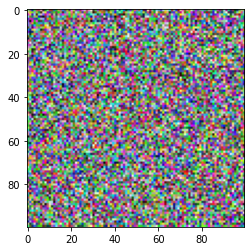

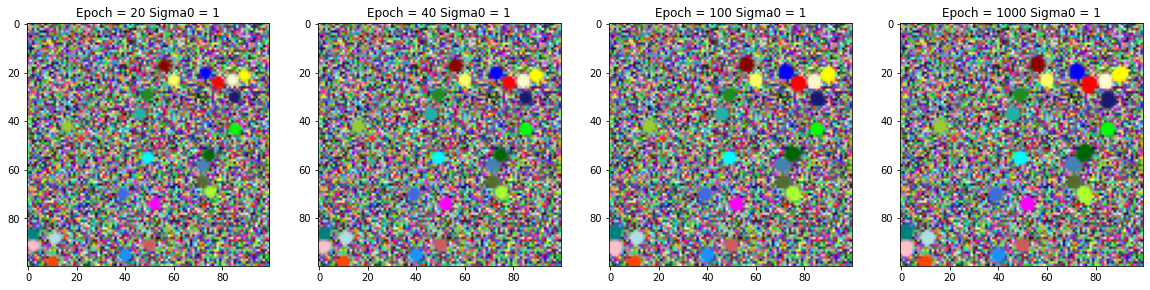

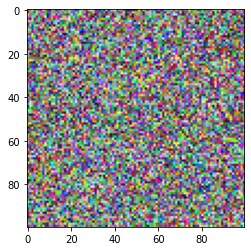

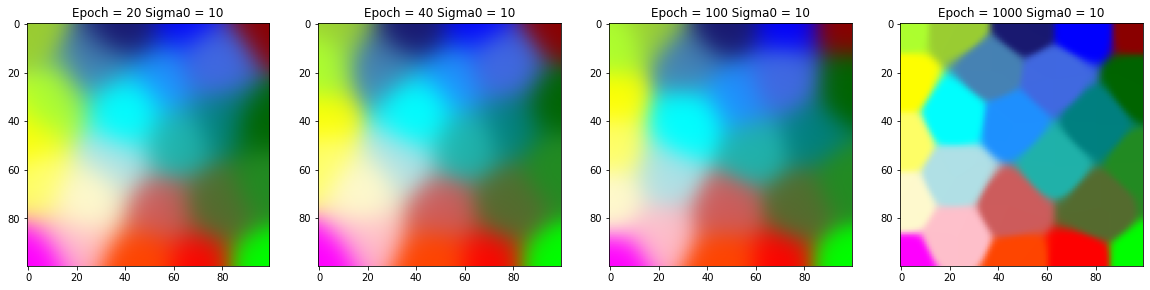

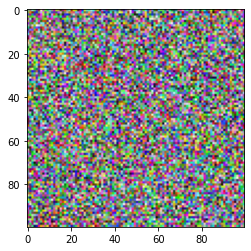

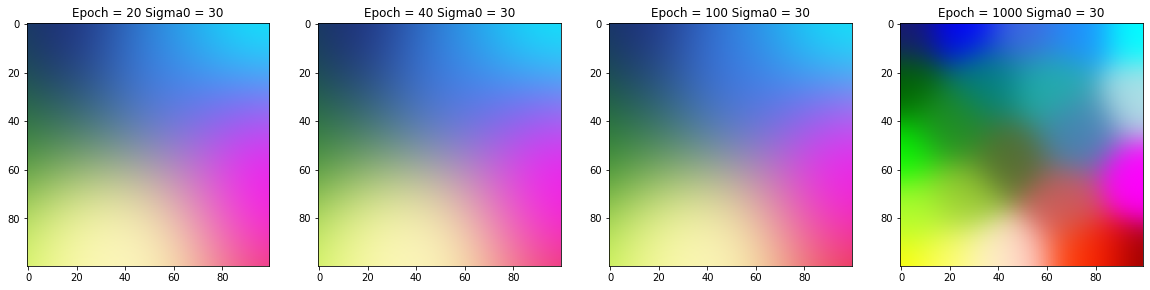

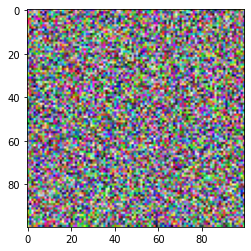

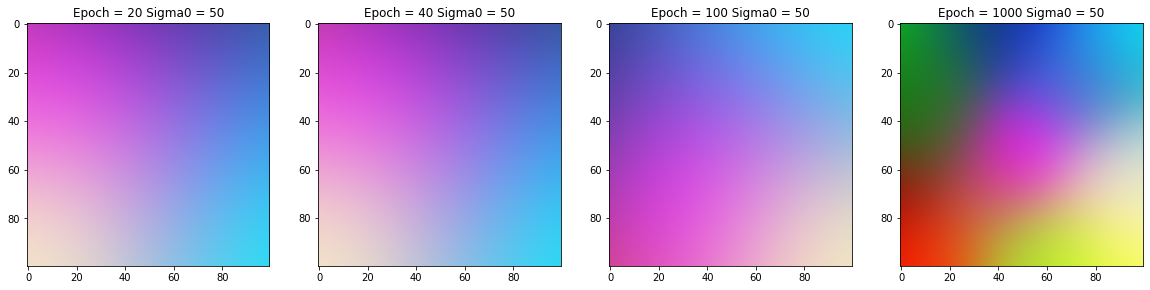

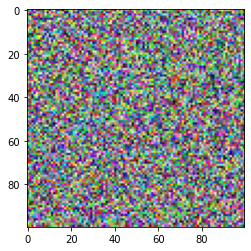

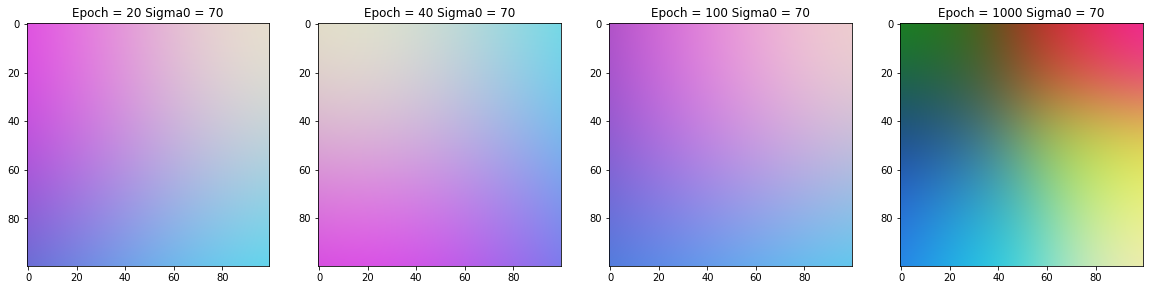

In [773]:
SigmaList = [ 1, 10, 30, 50, 70]
for i in SigmaList:
    model = SOM(Epochs = 1000)
    model.InitializeNeuronLayer(100,100)
    model.InitializeWeightMatrix(len(Input[0]))
    model.Cluster(Input, i, 0.8)

## b) Analysis

#### The above Plots show the outputs of the visual representation of the weight matrix with sigma0 ranging [1,10,30,50,70] and for epochs [20,40,100,1000]
#### Before each plots corresponding to sigma0 I have printed the initial randominzed weight matrix, i.e. the original weights

### Observations

#### Effect of sigma0

When the value of sigma0 is 1, the value of Nij is less, and as the number of epochs increases it becomes even smaller, this indicates that the indices very close to the least ||X-W|| get updated and for the rest of the indices the delta weight is so small that it tends to 0 after crossing few neurons from the least ||X-W|| neuron. Hence we see solid dots with very small radius. These dots get darker as we keep training the data for more epochs but don't merge with other colors.

When the value of sigma0 is 10, Nij is spread over more area, in this case as we increase the number of epochs, we observe that all 24 colors fill up the weight matrix and form boundaries wrt to the other colors. There is not significant blending of colors in this case and we observe there is not much of influence of one color on the other.

When the value of sigma0 is further increased, the value of Nij is more, the weights get upadated for a larger radius and hence an index will get influenced by more than one input color and hence the colors start to blend. For sigma0 = 30 we observe that the colors blend a little, for sigma0=50 and 70, the colors blend more and we get the shades that gets generated by mixing of more colors, and hence we observe a smooth transition from one color to another.

#### Effect of number of Epochs

As the number of Epochs increases keeping sigma0 constant, we observe that the colors start appearing more strong, this is because as we train the data the weights start getting closer and closer to the data color. Also we observe that when we increase the number of epochs the value of Nij and learning rate get affected,   
  
  i. The radius of the neighbourhood function reduces, as the value of sigma reduces and this inturn reduces Nij,  
  ii. The learning rate also reduces and hence the influence of a data point at Epoch 1 on its neighbours is greater than the influence of the same data point at a later Epoch (Epoch >1)
  
Hence as the number of epochs increase, the delta weight value reduces, it indirectly fine tunes the colors in their respective place.
 
